In [1]:
#import all necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#read the dataframe
loanDf = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [3]:
#look at the top few values 
loanDf.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
#get column types and null values in dataframe
loanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
#check the shape of dataframe
loanDf.shape

(5000, 14)

In [6]:
#statistical inference for each column of the dataframe
loanDf.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


We see that Experience have some negative values. This might be bad data as Experience can't be lower then 0.

In [7]:
#how many rows have bad data
print(loanDf[loanDf['Experience'] < 0].count())

ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64


In [8]:
#Negative values are less then 5% of the total data hence we can drop them
loanDf = loanDf[loanDf['Experience'] >= 0]

In [9]:
loanDf.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,2501.268795,45.557195,20.331043,73.814470,93151.573363,2.391471,1.935926,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,1443.277676,11.320735,11.311973,46.112596,2126.669017,1.148444,1.747694,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,1.000000,24.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1254.750000,36.000000,10.750000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2497.500000,46.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


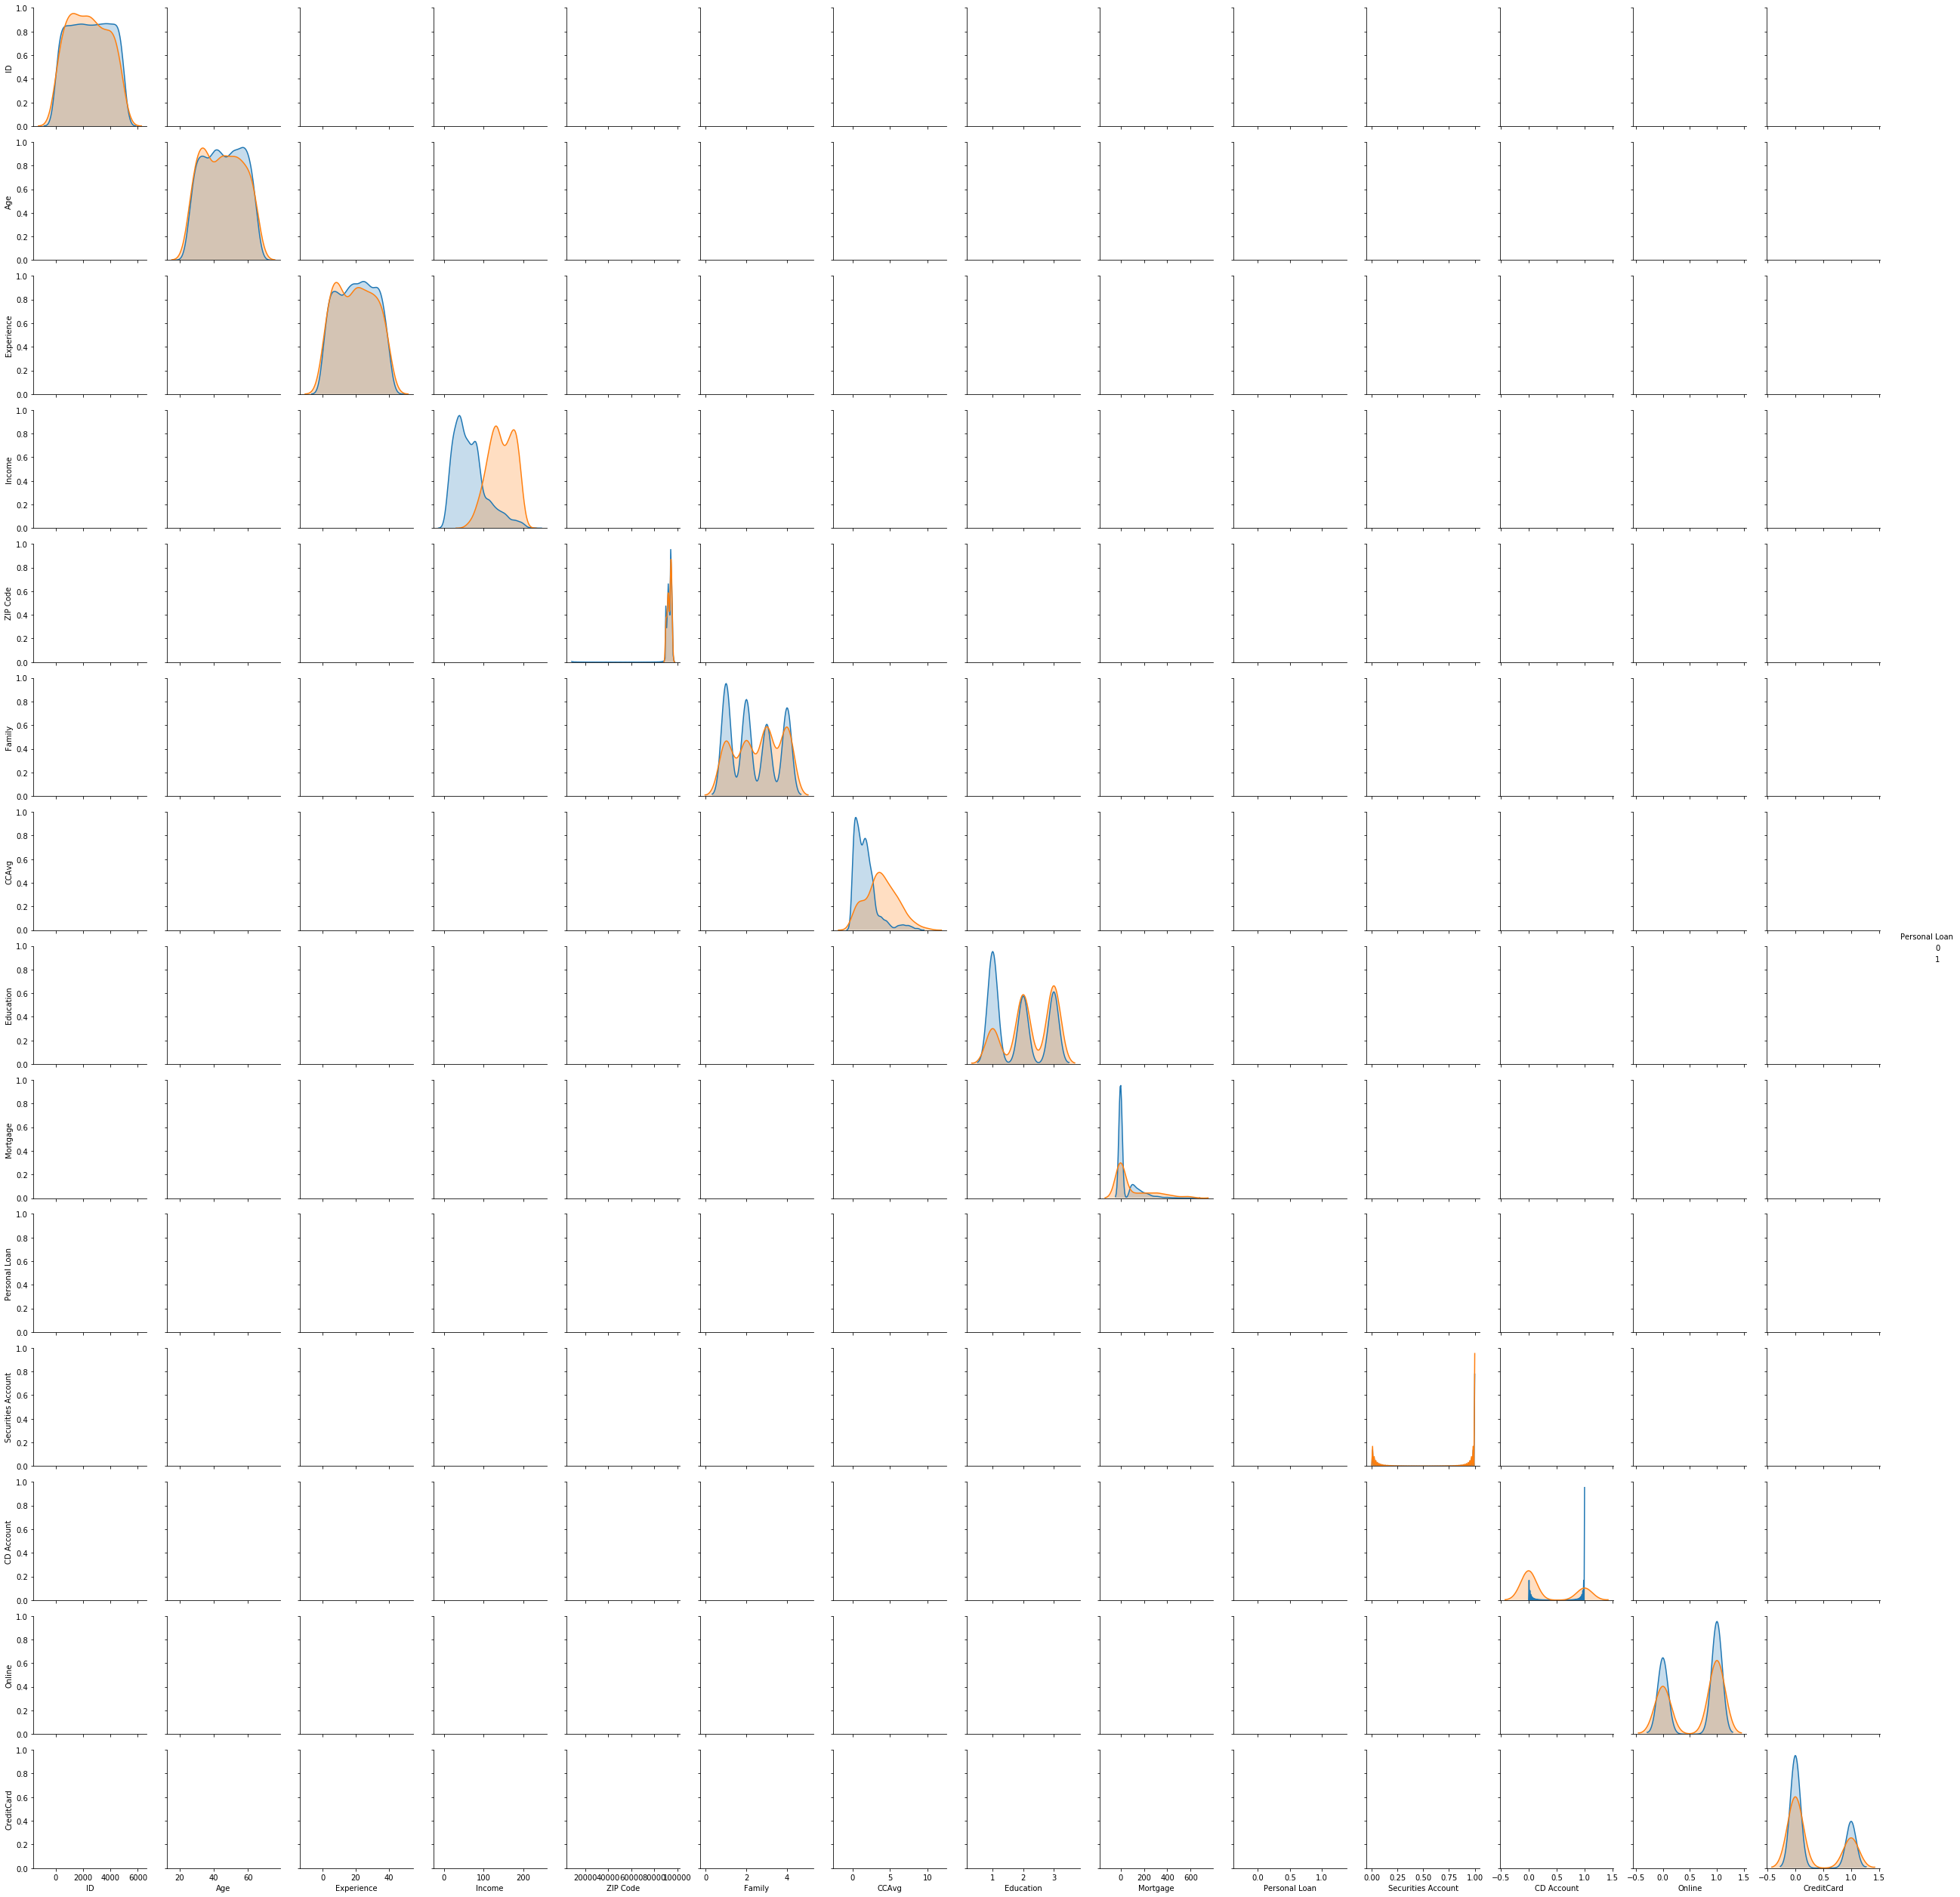

In [10]:
#pairplot to infer from data
sns.pairplot(loanDf, hue="Personal Loan", kind='kde')

We see that Income,CCAvg can be one of the best variables to separate the population. Online and CreditCard can also be used as important variables.

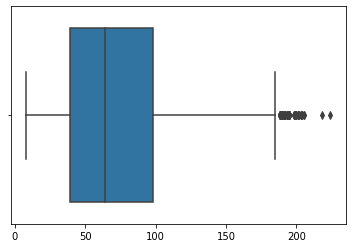

In [11]:
#univariate analysis
sns.boxplot(loanDf[['Income']])

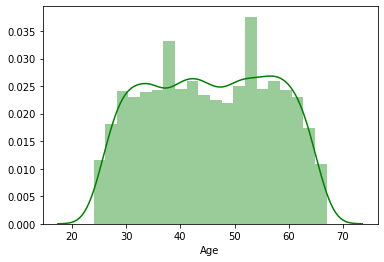

In [12]:
sns.distplot(loanDf['Age'], color = 'g')

Maximum people fall between 30 and 60  years.

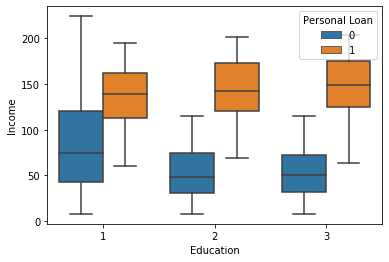

In [13]:
#bivariate analysis
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=loanDf)

There are only few people who earn more than 175K per year. Also People who have Education level 1 have high Income median but Education has no effect on Loan Taken.

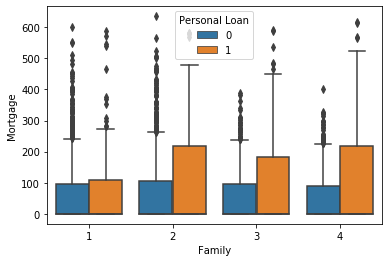

In [14]:
sns.boxplot(x='Family', y='Mortgage', hue="Personal Loan", data=loanDf)

People with Family size greater 2 have high Mortgages and are likely to apply for loan then single person. 

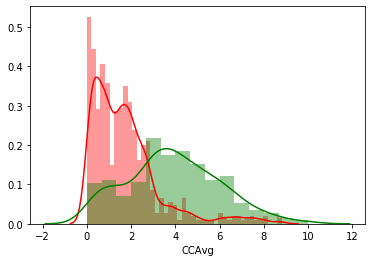

In [15]:
#analysis of Loan with respect to Credit Card spending
sns.distplot(loanDf[loanDf['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot(loanDf[loanDf['Personal Loan'] == 1]['CCAvg'], color = 'g')

In [16]:
print("Credit Card average spending of a customer without loan",loanDf[loanDf['Personal Loan'] == 0]['CCAvg'].median())
print("Credit Card average spending of a customer with loan",loanDf[loanDf['Personal Loan'] == 1]['CCAvg'].median())

Credit Card average spending of a customer without loan 1.4
Credit Card average spending of a customer with loan 3.8


People with high credit card spending have higher chances to accept a personal loan then people with less Credit card average.

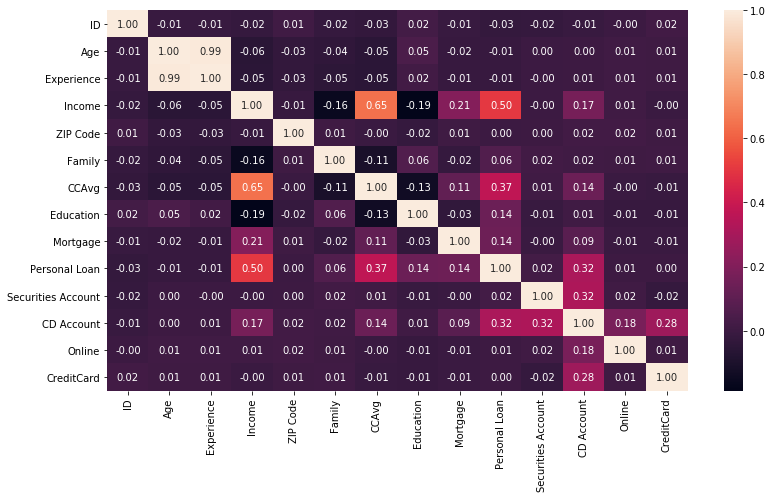

In [17]:
#plot the corelation Matrix
corr= loanDf.corr()
plt.figure(figsize=(13,7))
sns.heatmap(corr, annot=True, fmt='.2f')

Income is moderately corelated to CCAvg. Experience and Age are highly corelated.

In [18]:
#separate the dependent variable 
X= loanDf.drop(['ID','Personal Loan','Experience'],axis=1)
Y= loanDf['Personal Loan']

In [19]:
X.describe()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,73.814470,93151.573363,2.391471,1.935926,1.878941,56.634398,0.104285,0.061035,0.597009,0.294058
std,11.320735,46.112596,2126.669017,1.148444,1.747694,0.839745,101.828885,0.305660,0.239418,0.490549,0.455664
min,24.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000


Logistic Regression

In [20]:
# creating testing and training set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify = Y, random_state = 101)

In [21]:
# train scikit learn model 
clf = LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
#print the accuracy values
print("What is the Testing Accuracy")
print(clf.score(X_test,Y_test))
print("What is the Training Accuracy")
print(clf.score(X_train,Y_train))

What is the Testing Accuracy
0.9131313131313131
What is the Training Accuracy
0.9075945711810569


In [23]:
#predicted values
predicted = clf.predict(X_test)

In [24]:
#accuracy
print("Accuracy: ", accuracy_score(Y_test,predicted)*100)

Accuracy:  91.31313131313131


In [25]:
print('Confusion Matrix :')
cm = pd.DataFrame(confusion_matrix(Y_test, predicted).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

Confusion Matrix :


True,No,Yes
Predicted,,
No,1303,91
Yes,38,53


Naive Bayes

In [26]:
#scale the values
ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, Y, test_size=0.3, random_state=10)

In [27]:
#Gaussian Naive Bayes Model
modelGNB = GaussianNB()
modelGNB.fit(ZX_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
#Predict Values
y_predict = modelGNB.predict(ZX_test)

In [29]:
print('Confusion Matrix :')
gcm = pd.DataFrame(confusion_matrix(y_test, y_predict).T, index=['No', 'Yes'], columns=['No', 'Yes'])
gcm.index.name = 'Predicted'
gcm.columns.name = 'True'
gcm
#print(confusion_matrix(y_test, y_predict))

Confusion Matrix :


True,No,Yes
Predicted,,
No,1228,56
Yes,115,86


K Nearest Neighbours = 3

In [30]:
#Scale the values
ZXN = preprocessing.scale(X)
ZXN_train, ZXN_test, yn_train, yn_test = train_test_split(ZXN, Y, test_size=0.3, random_state=10)

In [31]:
#N Nearest Neighbours model
NNH= KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(ZXN_train, yn_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [32]:
#predict values
y_predictNNH = NNH.predict(ZXN_test)

In [33]:
print('Confusion Matrix :')
Kcm = pd.DataFrame(confusion_matrix(yn_test, y_predictNNH).T, index=['No', 'Yes'], columns=['No', 'Yes'])
Kcm.index.name = 'Predicted'
Kcm.columns.name = 'True'
Kcm

Confusion Matrix :


True,No,Yes
Predicted,,
No,1339,57
Yes,4,85


For this problem we look at the confusion matrix for each of the model created.
The main metrics to look over here is the False Negative Column. Which denotes that our Model predicted that the customer will not agree for the loan, however in reality he agreed. Thus we want to minimise our False Negative column as much as possible.
Looking above we see that Logistic Regression Model is producing too many False Negative compared to Naive Bayes and KNN.
Both Naive Bayes and KNN provides similar False Negative Value. However I would say that the best model here is KNN as it is providing the least FN as well as least FP(predicted is true and reality is false) which in turn helps the bank to save their resources and can focus more on customer which are likely to agree for a loan.